# **Implementation of Emotion Recognition in Text using LSTMs**
Paper Reference : https://thesai.org/Downloads/Volume10No6/Paper_45-Emotion_Detection_in_Text.pdf

### Method used: *Vanilla LSTM*

Accuracies Achieved : 
*   Training Data : 0.997
*   Testing Data : 0.916




In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import Regularizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import tensorflow.keras.utils as ku

In [ ]:
!pip install datasets

In [ ]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt

In [ ]:
#from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Load Dataset
train_data, test_data = load_dataset('emotion',split=['train','test']) # load dataset from huggingface hub
train_data_pd = pd.DataFrame(train_data) # convert to pandas data frame
test_data_pd = pd.DataFrame(test_data)
train_data_pd.head()

Using custom data configuration default


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
[4666, 5362, 1304, 2159, 1937, 572]


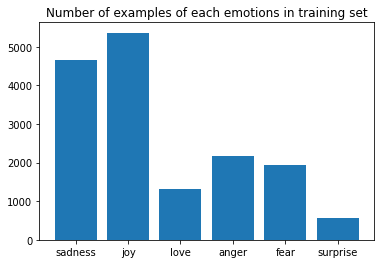

In [ ]:
#Data Statistics
labels = train_data.features['label'].names
count = list(train_data_pd.iloc[:,1].value_counts().sort_index().to_numpy())
print(labels)
print(count)

plt.xticks(range(len(labels)),labels)
plt.bar(range(len(labels)), count)
plt.title("Number of examples of each emotions in training set")
plt.show()

In [ ]:
#Tokenizer
tokenizer = Tokenizer()
data=train_data_pd.iloc[:,0]
tokenizer.fit_on_texts(data)

max=0
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in data:
	token_list = tokenizer.texts_to_sequences([line])[0]
	input_sequences.append(token_list)
	if (len(token_list)>max):
		max=len(token_list)

print(max)
#Padding (pre)
input=np.array(pad_sequences(input_sequences, maxlen=max, padding='pre'))
  

66


In [ ]:
#categorical data handling
label_given=train_data_pd.iloc[:,1]
label_given = ku.to_categorical(label_given, num_classes=6)


In [ ]:
#Model Architecture
model = Sequential()
model.add(Embedding(total_words, 50, input_length=max))  #(# Your Embedding Layer)
model.add(LSTM(50))  #(# A LSTM Layer)
model.add(Dropout(0.2))  #(# A dropout layer)
model.add(Dense(20, activation='relu')) #(New addded layer)
model.add(Dense(6, activation='softmax'))  #(# A Dense Layer for Output)

In [ ]:
opt = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics='accuracy')  #loss function and an optimizer
print(model.summary()) #print model summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 66, 50)            760650    
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 6)                 126       
                                                                 
Total params: 781,996
Trainable params: 781,996
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(input, label_given, epochs=100, verbose=1)

Epoch 1/100
500/500 [==============================] - 4s 6ms/step - loss: 1.4185 - accuracy: 0.3919
Epoch 2/100
500/500 [==============================] - 3s 6ms/step - loss: 0.5958 - accuracy: 0.7912
Epoch 3/100
500/500 [==============================] - 3s 6ms/step - loss: 0.2441 - accuracy: 0.9171
Epoch 4/100
500/500 [==============================] - 3s 6ms/step - loss: 0.1432 - accuracy: 0.9541
Epoch 5/100
500/500 [==============================] - 3s 6ms/step - loss: 0.1015 - accuracy: 0.9676
Epoch 6/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0749 - accuracy: 0.9756
Epoch 7/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0564 - accuracy: 0.9809
Epoch 8/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0575 - accuracy: 0.9815
Epoch 9/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0442 - accuracy: 0.9856
Epoch 10/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0383 - accura

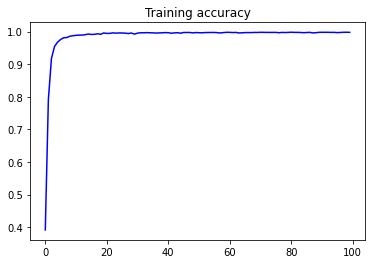

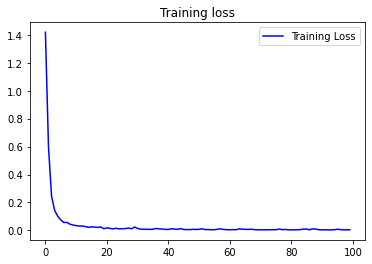

In [ ]:
#Referenced from previous Assignment
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [ ]:
#Preprocessing Testing Data
test_data=test_data_pd.iloc[:,0]
testing=[]
for text in test_data:
  testing.append(tokenizer.texts_to_sequences([text])[0])

testing=np.array(pad_sequences(testing, maxlen=max, padding='pre'))
test_labels=test_data_pd["label"]
test_labels=ku.to_categorical(test_labels, num_classes=6)
  

In [ ]:
#Generating Predictions 
prediction=model.predict(testing)
prediction=np.argmax(prediction, axis=1)

In [ ]:
#Evaluating Model
model.evaluate(testing, test_labels)

63/63 [==============================] - 1s 4ms/step - loss: 0.6618 - accuracy: 0.9165


[0.6617798209190369, 0.9164999723434448]